<a href="https://colab.research.google.com/github/adidev001/vehicle-emissionscalssifiacation-model/blob/main/vehicle_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install plotly


In [6]:


#  Step 2: Upload the dataset
uploaded = files.upload()
df = pd.read_csv('vehicle_emissions.csv')

Saving vehicle_emissions.csv to vehicle_emissions (2).csv


📊 Dataset Overview:
   engine_size fuel_type  co2_emissions emission_category
0     1.887889    petrol     215.413794                 B
1     1.924299  electric     234.463942                 C
2     3.687571    diesel     180.042027                 A
3     1.078842    petrol     156.704264                 A
4     1.416434    diesel     269.166344                 A

📈 Column Names:
Index(['engine_size', 'fuel_type', 'co2_emissions', 'emission_category'], dtype='object')


<ipython-input-15-10b244f6b2a0>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='predicted_emission_category', order=order, palette='coolwarm')
<ipython-input-15-10b244f6b2a0>:44: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


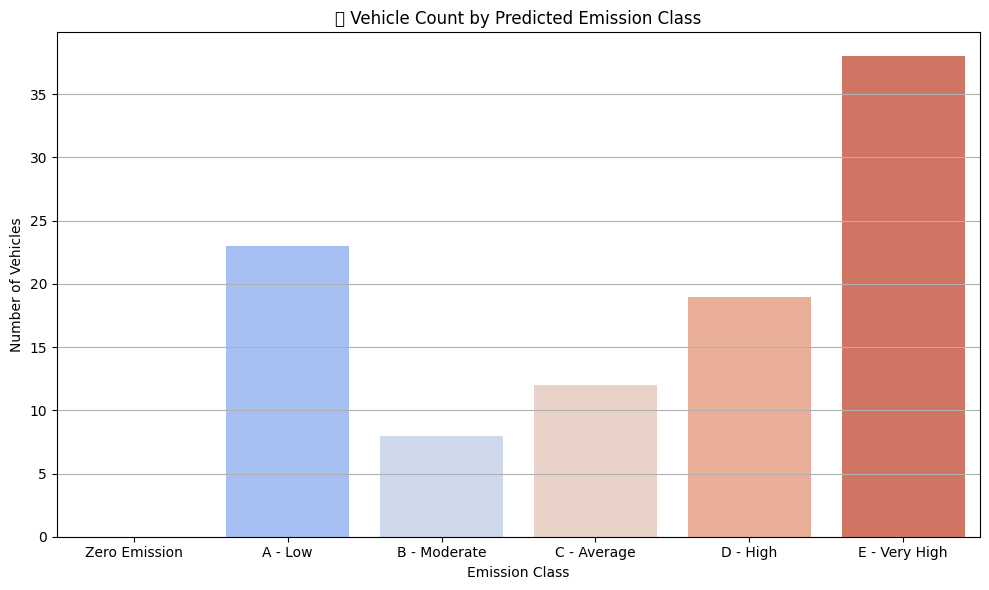

<ipython-input-15-10b244f6b2a0>:53: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


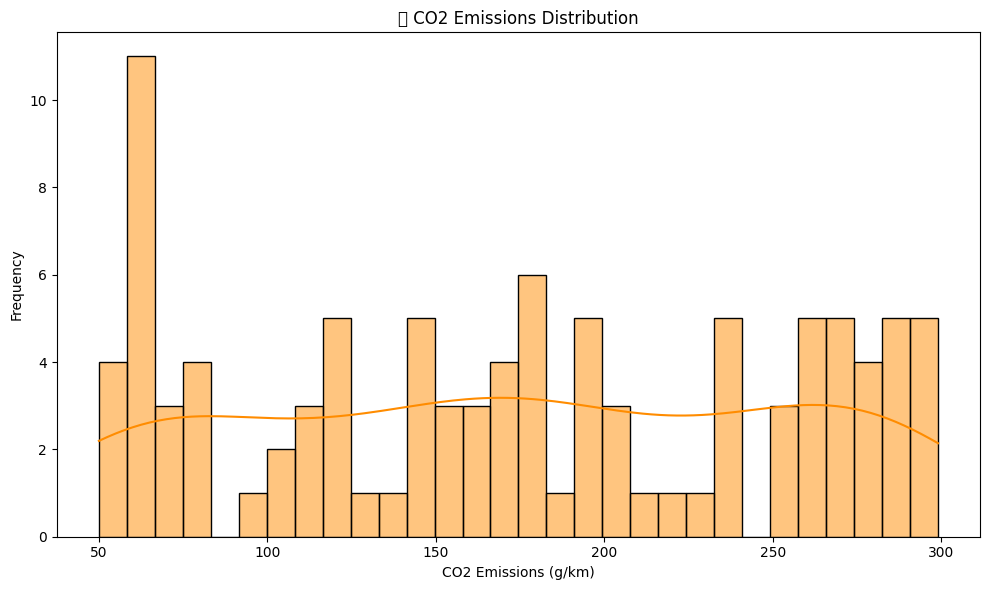

<ipython-input-15-10b244f6b2a0>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuel_type', y='co2_emissions', palette='Set2')
<ipython-input-15-10b244f6b2a0>:62: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


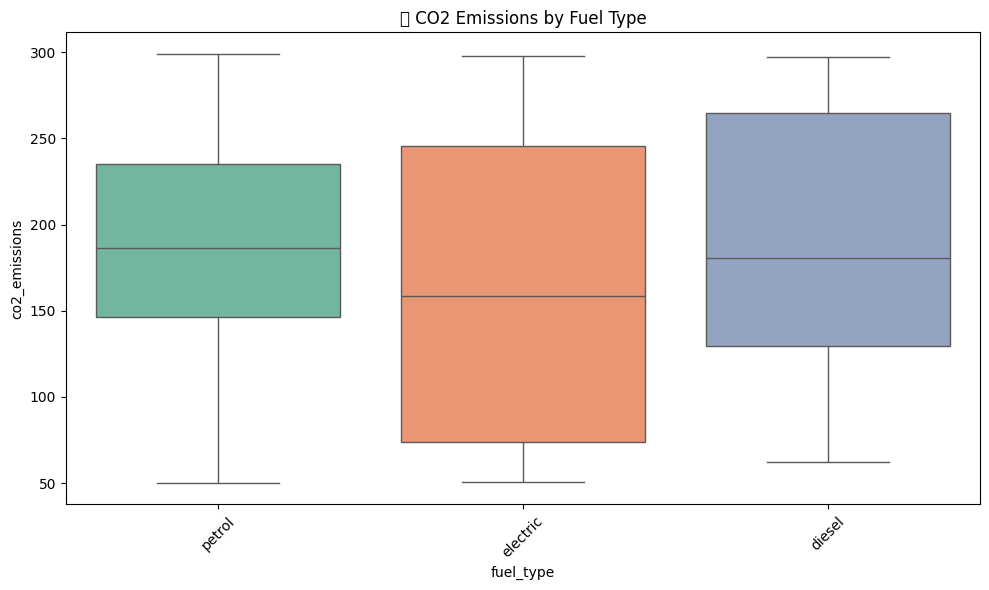

<ipython-input-15-10b244f6b2a0>:76: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


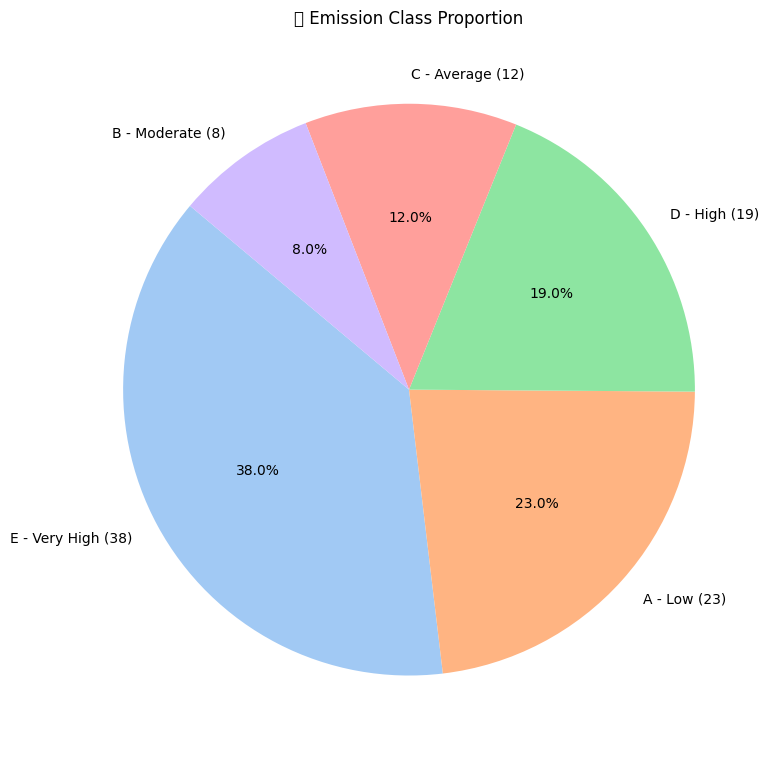

<ipython-input-15-10b244f6b2a0>:83: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


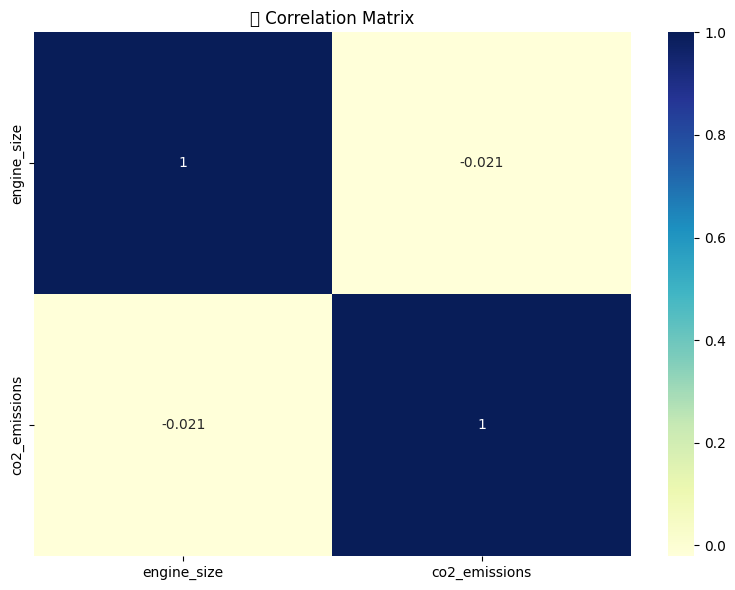

<ipython-input-15-10b244f6b2a0>:93: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


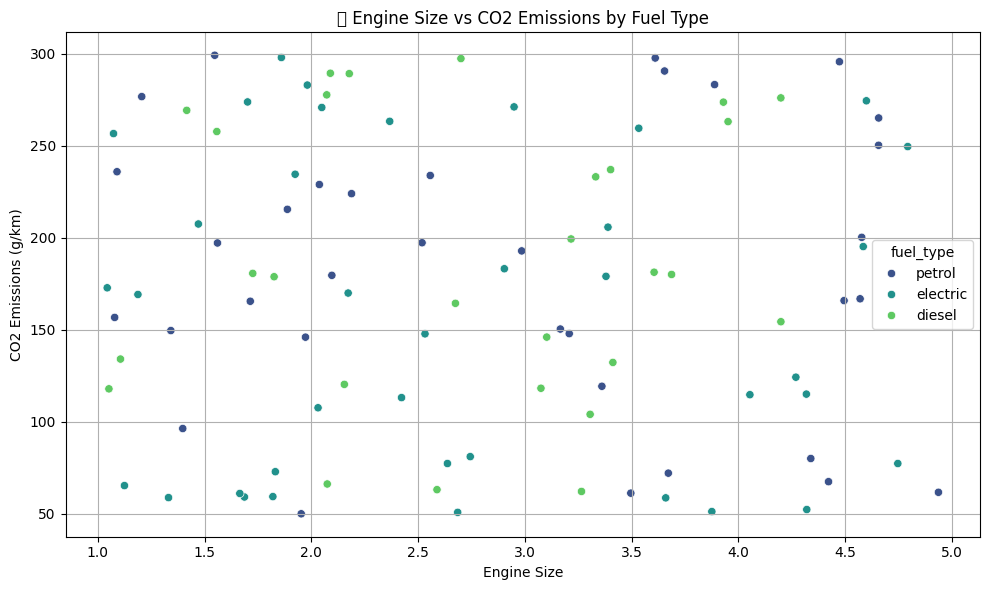

In [15]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  Step 2: Load Dataset
file_path = '/content/vehicle_emissions.csv'  # Change if needed
df = pd.read_csv(file_path)

# Step 3: Display data overview
print("📊 Dataset Overview:")
print(df.head())
print("\n📈 Column Names:")
print(df.columns)

# Step 4: Emission Classifier Function (based on co2_emissions)
def classify_emission(co2):
    if co2 == 0:
        return 'Zero Emission'
    elif co2 <= 100:
        return 'A - Low'
    elif co2 <= 120:
        return 'B - Moderate'
    elif co2 <= 160:
        return 'C - Average'
    elif co2 <= 200:
        return 'D - High'
    else:
        return 'E - Very High'

# Step 5: Apply Classifier
df = df.dropna(subset=['co2_emissions'])
df['predicted_emission_category'] = df['co2_emissions'].apply(classify_emission)

# Step 6: Count Plot - Predicted Emission Category
order = ['Zero Emission', 'A - Low', 'B - Moderate', 'C - Average', 'D - High', 'E - Very High']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='predicted_emission_category', order=order, palette='coolwarm')
plt.title('🚗 Vehicle Count by Predicted Emission Class')
plt.xlabel('Emission Class')
plt.ylabel('Number of Vehicles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 7: Histogram - CO2 Emissions
plt.figure(figsize=(10, 6))
sns.histplot(df['co2_emissions'], bins=30, kde=True, color='darkorange')
plt.title('🌫️ CO2 Emissions Distribution')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 8: Boxplot - CO2 Emissions by Fuel Type
if 'fuel_type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='fuel_type', y='co2_emissions', palette='Set2')
    plt.title('CO2 Emissions by Fuel Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# step 9: Pie Chart - Emission Category Distribution
emission_counts = df['predicted_emission_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    emission_counts,
    labels=[f'{label} ({count})' for label, count in zip(emission_counts.index, emission_counts)],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Emission Class Proportion')
plt.tight_layout()
plt.show()

#  Step 10: Heatmap - Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['engine_size', 'co2_emissions']].corr(), annot=True, cmap='YlGnBu')
plt.title(' Correlation Matrix')
plt.tight_layout()
plt.show()

#  Step 11: Scatter Plot - Engine Size vs CO2 Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engine_size', y='co2_emissions', hue='fuel_type', palette='viridis')
plt.title(' Engine Size vs CO2 Emissions by Fuel Type')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.tight_layout()
plt.show()
